In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### PLOTTING FUNCTIONS

In [2]:
# Function to plot specified variable per run
def plot_all_runs(df_list, var, color=None):
    label = var
    for df in df_list:
        df[var].plot(label=label, color=color) if color else df[var].plot(label=label)
        label="_nolegend_"  # This avoids duplicates in plot legend
    plt.xlabel("Year")
    plt.ylabel(var)
    plt.legend()

def plot_difference(df_list, var1, var2):
    label = str(var1) + " - " + str(var2)
    for df in df_list:
        diff = df[var1] - df[var2]
        diff.plot(label=label)
        label="_nolegend_"  # This avoids duplicates in plot legend
    plt.xlabel("Time")
    plt.ylabel("Amount")
    plt.legend()

def plot_avg_per_type(df_list, agent_type, var, color=None, label=None):
    if not label:
        label = agent_type
    for df in df_list:
        df = df[df["Type"] == agent_type]
        mean = df.groupby(["Step"])[var].mean()
        std = df.groupby(["Step"])[var].std()
        plt.plot(mean, label=label, color=color)
        plt.fill_between(sorted(list(set(df["Step"].values))), mean, mean - std, color=color, alpha=0.2)
        plt.fill_between(sorted(list(set(df["Step"].values))), mean + std, mean, color=color, alpha=0.2)
        label="_nolegend_"  # This avoids duplicates in plot legend
    plt.xlabel("Timestep")
    plt.ylabel(var)
    plt.legend()

def plot_total_per_type(df_list, agent_type, var, color=None, label=None):
    if not label:
        label = agent_type
    for df in df_list:
        df = df[df["Type"] == agent_type]
        df.groupby(["Step"])[var].sum().plot(label=label, color=color)
        label="_nolegend_"  # This avoids duplicates in plot legend
    plt.xlabel("Timestep")
    plt.ylabel(var)
    plt.legend()

### READ DATA

#### Model variables

In [3]:
# Read all model variables to list
model_vars_df_list = []
for file in os.listdir("results/"):
    if file.startswith("model"):
        df = pd.read_csv("results/" + file)
        model_vars_df_list.append(df)

# Save timesteps where floods occur
n_steps = len(model_vars_df_list[0])
flood_timesteps = np.array(model_vars_df_list[0].index[model_vars_df_list[0]["Flood"] == True])
flood_timesteps -= 1
print("FLOODS IMPLEMENTED AT TIMESTEPS", flood_timesteps)

# Show first dataframe
model_vars_df_list[0]

FLOODS IMPLEMENTED AT TIMESTEPS []


,Flood,N households,N cap firms,N cons firms,N serv firms,Regional demand,Export demand,Unemployment rate,Min wage,Avg wage,N cap bankrupt,N cons bankrupt,N serv bankrupt
0,False,10000,53,99,302,7882.536,0.0,0.42,0.505,0.995652,0,1,1
1,False,10000,55,98,303,7316.615,0.0,0.52,0.495,0.989901,0,3,1
2,False,10000,61,95,306,7185.861,0.0,0.55,0.495,0.990756,0,1,1
3,False,10000,64,93,308,7242.040,0.0,0.54,0.495,0.991973,0,1,1
4,False,10000,66,91,307,7239.099,0.0,0.54,0.495,0.993172,0,1,1
5,False,10000,70,90,306,7300.020,0.0,0.54,0.500,1.004280,0,1,1
6,False,10000,76,89,304,7777.771,0.0,0.46,0.505,1.005600,0,1,1
7,False,10000,76,89,305,7814.531,0.0,0.45,0.505,1.007825,0,1,1
8,False,10000,81,86,304,7498.981,0.0,0.52,0.505,1.015843,1,1,1
9,False,10000,82,86,307,7550.808,0.0,0.52,0.510,1.017939,0,1,1


#### Agent variables

In [4]:
agent_vars_df_list = []
for file in os.listdir("results/"):
    if file.startswith("agent"):
        print(file)
        df = pd.read_csv("results/" + file)
        agent_vars_df_list.append(df)

# Split firms per type
cap_firms = agent_vars_df_list[0][agent_vars_df_list[0]["Type"] == "<class 'CRAB_agents.CapitalFirm'>"].copy()
cons_firms = agent_vars_df_list[0][agent_vars_df_list[0]["Type"] == "<class 'CRAB_agents.ConsumptionGoodFirm'>"].copy()
serv_firms = agent_vars_df_list[0][agent_vars_df_list[0]["Type"] == "<class 'CRAB_agents.ServiceFirm'>"].copy()
# Split dataframe into firms created at beginning and during runtime
old_firms = list(set(agent_vars_df_list[0][agent_vars_df_list[0]["AgentID"] < 10000]["AgentID"].values))
new_firms = list(set(agent_vars_df_list[0][agent_vars_df_list[0]["AgentID"] > 10000]["AgentID"].values))

agent_vars_df_list[0]

agent_vars_0.csv


,Step,AgentID,Type,Net worth,Wage,Consumption,Sales,Price,Market share,Feasible_prod,...,Capital amount,Real demand,Demand filled,Demand unfilled,N replacements,N expansion,Size,Labor demand,Markup,Lifetime
0,4,1,<class 'CRAB_agents.CapitalFirm'>,43.3650,1.049,NaN,0.0000,1.467000,0.020000,0.0,...,60.0,0.000,0.000,0.000,0.0,0.0,2.0,2.0,NaN,5.0
1,4,2,<class 'CRAB_agents.CapitalFirm'>,43.3380,1.056,NaN,0.0000,1.459000,0.020000,0.0,...,60.0,0.000,0.000,0.000,0.0,0.0,2.0,2.0,NaN,5.0
2,4,3,<class 'CRAB_agents.CapitalFirm'>,43.3460,1.051,NaN,0.0000,1.453000,0.020000,0.0,...,60.0,0.000,0.000,0.000,0.0,0.0,2.0,2.0,NaN,5.0
3,4,4,<class 'CRAB_agents.CapitalFirm'>,43.3210,1.052,NaN,0.0000,1.526000,0.020000,0.0,...,60.0,0.000,0.000,0.000,0.0,0.0,2.0,2.0,NaN,5.0
4,4,5,<class 'CRAB_agents.CapitalFirm'>,43.3200,1.057,NaN,0.0000,1.438000,0.020000,0.0,...,60.0,0.000,0.000,0.000,0.0,0.0,2.0,2.0,NaN,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
523004,200,11021,<class 'CRAB_agents.ServiceFirm'>,608.2002,1.564,NaN,4.2228,0.972547,0.000644,5.0,...,5.0,5.264,4.342,0.922,0.0,2.0,2.0,2.0,0.35,2.0
523005,200,11022,<class 'CRAB_agents.ServiceFirm'>,608.0950,1.576,NaN,4.2552,0.969294,0.000644,5.0,...,5.0,5.281,4.390,0.891,0.0,2.0,2.0,2.0,0.35,2.0
523006,200,11023,<class 'CRAB_agents.ConsumptionGoodFirm'>,786.8319,1.470,NaN,1.9071,0.879659,0.001126,1.0,...,5.0,5.484,2.168,3.316,0.0,0.0,1.0,1.0,0.35,1.0
523007,200,11024,<class 'CRAB_agents.ServiceFirm'>,613.3908,1.586,NaN,2.0527,0.946817,0.000742,1.0,...,5.0,6.229,2.168,4.061,0.0,0.0,1.0,1.0,0.35,1.0


### SANITY CHECKS

#### HOUSEHOLDS

##### HH CONSUMPTION

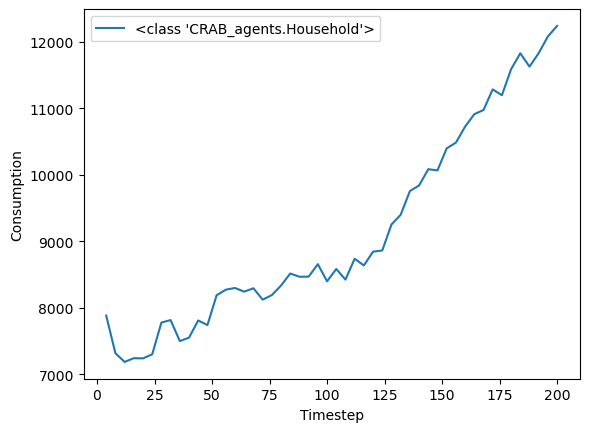

In [5]:
# Plot household consumption
plot_total_per_type(agent_vars_df_list, agent_type="<class 'CRAB_agents.Household'>", var="Consumption")
plt.vlines(flood_timesteps, ymin=0, ymax=12000, color="grey", linestyle="--", linewidth=0.7)
plt.show()

##### HH Flood damages

In [ ]:
plot_all_runs(model_vars_df_list, "Total flood damage")
plt.vlines(flood_timesteps, ymin=0, ymax=45000, color="grey", linestyle="--", linewidth=0.7)
plt.show()

##### ADAPTATION

##### Adaptation diffusion per measure

In [ ]:
plot_all_runs(model_vars_df_list, "Adaptation: elevation", color="tab:orange")
plot_all_runs(model_vars_df_list, "Adaptation: wet-proofing", color="tab:blue")
plot_all_runs(model_vars_df_list, "Adaptation: dry-proofing", color="tab:green")

##### HH Net worth

In [ ]:
plot_all_runs(model_vars_df_list, "Total HH net worth")
plt.vlines(flood_timesteps, ymin=0, ymax=12000, color="grey", linestyle="--", linewidth=0.7)
plt.show()

### FIRMS

#### N FIRMS

##### N firms

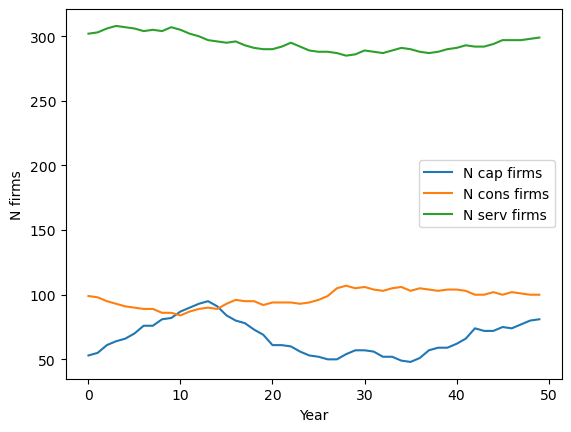

In [6]:
# Plot number of firms per sector
plot_all_runs(model_vars_df_list, "N cap firms", color="tab:blue")
plot_all_runs(model_vars_df_list, "N cons firms", color="tab:orange")
plot_all_runs(model_vars_df_list, "N serv firms", color="tab:green")

plt.ylabel("N firms")
plt.show()

##### N firms bankrupt

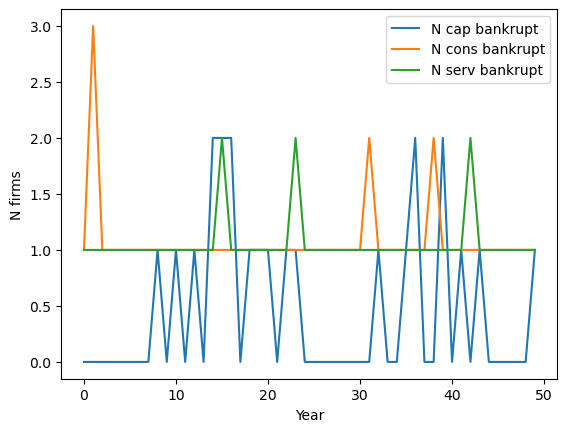

Average bankrupt cap: 0.46
Average bankrupt cons: 1.08
Average bankrupt serv: 1.06



In [7]:
# Plot number of firms going bankrupt per sector
plot_all_runs(model_vars_df_list, "N cap bankrupt", color="tab:blue")
plot_all_runs(model_vars_df_list, "N cons bankrupt", color="tab:orange")
plot_all_runs(model_vars_df_list, "N serv bankrupt", color="tab:green")
plt.ylabel("N firms")
plt.show()

for df in model_vars_df_list:
    print("Average bankrupt cap:", df["N cap bankrupt"].mean())
    print("Average bankrupt cons:", df["N cons bankrupt"].mean())
    print("Average bankrupt serv:", df["N serv bankrupt"].mean())
    print()

#### DEMAND

##### Sectoral demand

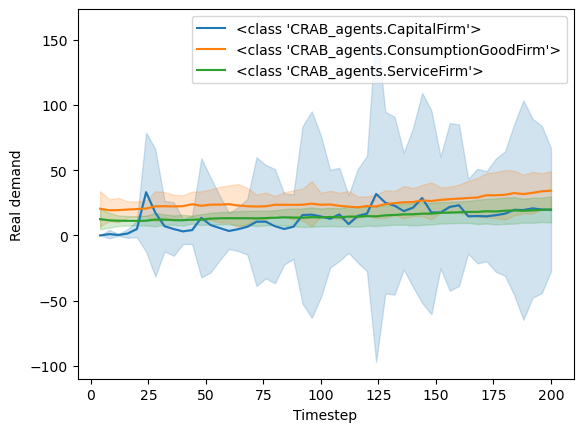

In [8]:
# Plot average demand per sector
plot_avg_per_type(agent_vars_df_list, agent_type="<class 'CRAB_agents.CapitalFirm'>", var="Real demand", color="tab:blue")
plot_avg_per_type(agent_vars_df_list, agent_type="<class 'CRAB_agents.ConsumptionGoodFirm'>", var="Real demand", color="tab:orange")
plot_avg_per_type(agent_vars_df_list, agent_type="<class 'CRAB_agents.ServiceFirm'>", var="Real demand", color="tab:green")
plt.vlines(flood_timesteps, ymin=0, ymax=50, color="grey", linestyle="--", linewidth=0.7)
plt.show()

##### Production made vs. Demand vs. Inventories

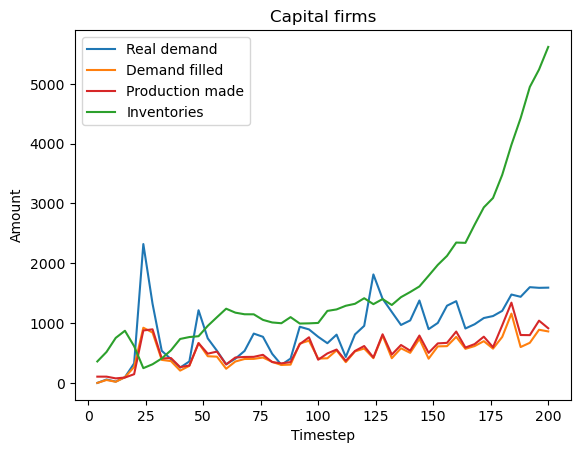

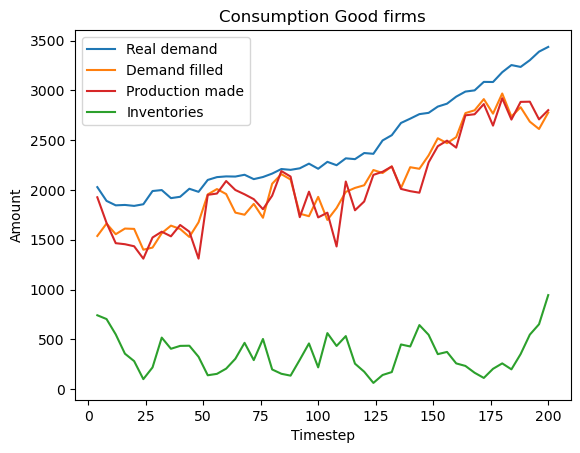

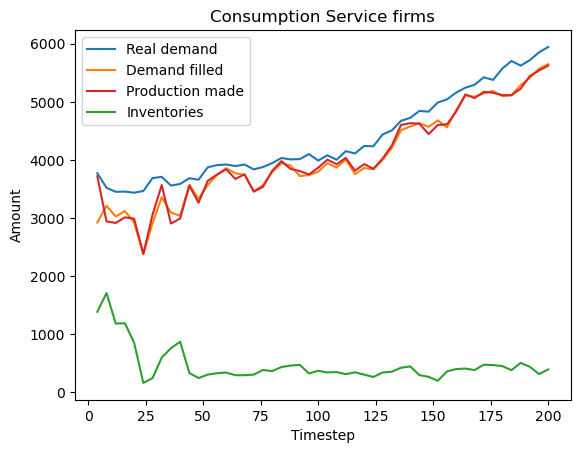

In [9]:
# Plot average demand per sector
plot_total_per_type(agent_vars_df_list, agent_type="<class 'CRAB_agents.CapitalFirm'>", var="Real demand", color="tab:blue", label="Real demand")
plot_total_per_type(agent_vars_df_list, agent_type="<class 'CRAB_agents.CapitalFirm'>", var="Demand filled", color="tab:orange", label="Demand filled")
plot_total_per_type(agent_vars_df_list, agent_type="<class 'CRAB_agents.CapitalFirm'>", var="Production made", color="tab:red", label="Production made")
plot_total_per_type(agent_vars_df_list, agent_type="<class 'CRAB_agents.CapitalFirm'>", var="Inventories", color="tab:green", label="Inventories")
plt.ylabel("Amount")
plt.title("Capital firms")
plt.show()

# Plot average demand per sector
plot_total_per_type(agent_vars_df_list, agent_type="<class 'CRAB_agents.ConsumptionGoodFirm'>", var="Real demand", color="tab:blue", label="Real demand")
plot_total_per_type(agent_vars_df_list, agent_type="<class 'CRAB_agents.ConsumptionGoodFirm'>", var="Demand filled", color="tab:orange", label="Demand filled")
plot_total_per_type(agent_vars_df_list, agent_type="<class 'CRAB_agents.ConsumptionGoodFirm'>", var="Production made", color="tab:red", label="Production made")
plot_total_per_type(agent_vars_df_list, agent_type="<class 'CRAB_agents.ConsumptionGoodFirm'>", var="Inventories", color="tab:green", label="Inventories")
plt.ylabel("Amount")
plt.title("Consumption Good firms")
plt.show()

# Plot average demand per sector
plot_total_per_type(agent_vars_df_list, agent_type="<class 'CRAB_agents.ServiceFirm'>", var="Real demand", color="tab:blue", label="Real demand")
plot_total_per_type(agent_vars_df_list, agent_type="<class 'CRAB_agents.ServiceFirm'>", var="Demand filled", color="tab:orange", label="Demand filled")
plot_total_per_type(agent_vars_df_list, agent_type="<class 'CRAB_agents.ServiceFirm'>", var="Production made", color="tab:red", label="Production made")
plot_total_per_type(agent_vars_df_list, agent_type="<class 'CRAB_agents.ServiceFirm'>", var="Inventories", color="tab:green", label="Inventories")
plt.ylabel("Amount")
plt.title("Consumption Service firms")
plt.show()

##### Individual firms

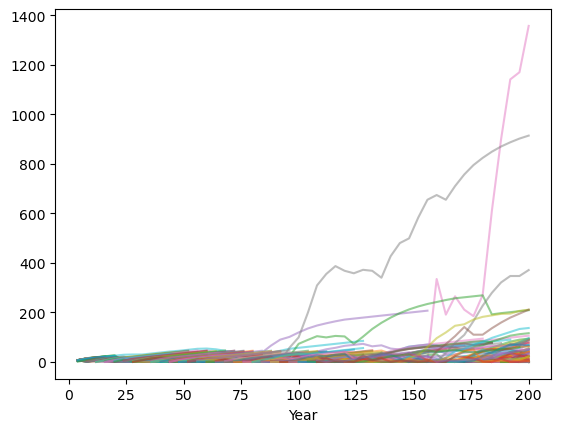

In [11]:
for i in list(set(cap_firms["AgentID"].values)):
    cap_firms[cap_firms["AgentID"] == i].set_index("Step")["Inventories"].plot(alpha=0.5)
plt.xlabel("Year")
plt.show()

##### Demand filled

In [ ]:
# Plot average demand per sector
plot_total_per_type(agent_vars_df_list, agent_type="<class 'CRAB_agents.CapitalFirm'>", var="Demand filled", color="tab:blue")
plot_total_per_type(agent_vars_df_list, agent_type="<class 'CRAB_agents.ConsumptionGoodFirm'>", var="Demand filled", color="tab:orange")
plot_total_per_type(agent_vars_df_list, agent_type="<class 'CRAB_agents.ServiceFirm'>", var="Demand filled", color="tab:green")
plt.vlines(flood_timesteps, ymin=0, ymax=50, color="grey", linestyle="--", linewidth=0.7)
plt.ylim(0, 10000)
plt.show()

##### Demand unfilled

In [ ]:
# Plot average demand per sector
plot_total_per_type(agent_vars_df_list, agent_type="<class 'CRAB_agents.CapitalFirm'>", var="Demand unfilled", color="tab:blue")
# plot_total_per_type(agent_vars_df_list, agent_type="<class 'CRAB_agents.ConsumptionGoodFirm'>", var="Demand unfilled", color="tab:orange")
# plot_total_per_type(agent_vars_df_list, agent_type="<class 'CRAB_agents.ServiceFirm'>", var="Demand unfilled", color="tab:green")
plt.vlines(flood_timesteps, ymin=0, ymax=50, color="grey", linestyle="--", linewidth=0.7)
# plt.xlim(0, 50)
plt.show()

##### Inventories

In [ ]:
plot_avg_per_type(agent_vars_df_list, agent_type="<class 'CRAB_agents.CapitalFirm'>", var="Inventories", color="tab:blue")
plot_avg_per_type(agent_vars_df_list, agent_type="<class 'CRAB_agents.ConsumptionGoodFirm'>", var="Inventories", color="tab:orange")
plot_avg_per_type(agent_vars_df_list, agent_type="<class 'CRAB_agents.ServiceFirm'>", var="Inventories", color="tab:green")
plt.vlines(flood_timesteps, ymin=-1, ymax=15, color="grey", linestyle="--", linewidth=0.7)
plt.show()

##### Inventories/demand

In [ ]:
# Plot inventory level as fraction of demand
for i in range(len(agent_vars_df_list)):
    df = agent_vars_df_list[i]
    df["Inv/demand"] = df["Inventories"]/df["Real demand"]
    df = df.replace({np.inf: np.nan})
    agent_vars_df_list[i] = df
plot_avg_per_type(agent_vars_df_list, agent_type="<class 'CRAB_agents.CapitalFirm'>", var="Inv/demand", color="tab:blue")
plot_avg_per_type(agent_vars_df_list, agent_type="<class 'CRAB_agents.ConsumptionGoodFirm'>", var="Inv/demand", color="tab:orange")
plot_avg_per_type(agent_vars_df_list, agent_type="<class 'CRAB_agents.ServiceFirm'>", var="Inv/demand", color="tab:green")
plt.vlines(flood_timesteps, ymin=-1, ymax=20, color="grey", linestyle="--", linewidth=0.7)
plt.show()

#### LABOR

##### UNEMPLOYMENT RATE

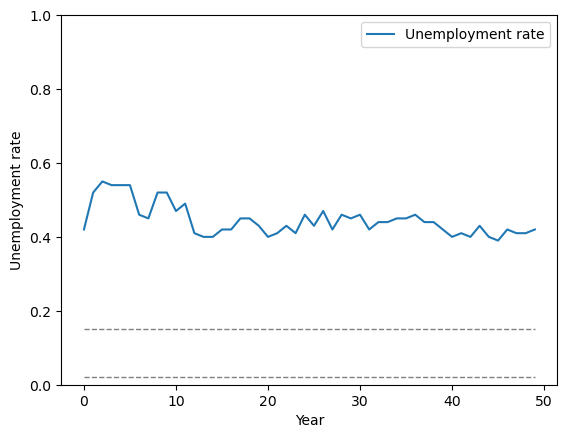

In [12]:
# Unemployment rate should vary between min 2-3 and max 10-15 percent
plot_all_runs(model_vars_df_list, "Unemployment rate", color="tab:blue")
plt.hlines(y=0.02, xmin=0, xmax=max(model_vars_df_list[0].index), color="grey", linestyle="--", linewidth=1)
plt.hlines(y=0.15, xmin=0, xmax=max(model_vars_df_list[0].index), color="grey", linestyle="--", linewidth=1)
plt.vlines(flood_timesteps, ymin=0, ymax=1, color="grey", linestyle="--", linewidth=0.7)
plt.ylim(0, 1)
plt.show()

##### SIZE

In [ ]:
# Plot size (n employers) for all firms (average)
plot_avg_per_type(agent_vars_df_list, agent_type="<class 'CRAB_agents.CapitalFirm'>", var="Size", color="tab:blue")
plot_avg_per_type(agent_vars_df_list, agent_type="<class 'CRAB_agents.ConsumptionGoodFirm'>", var="Size", color="tab:orange")
plot_avg_per_type(agent_vars_df_list, agent_type="<class 'CRAB_agents.ServiceFirm'>", var="Size", color="tab:green")
plt.hlines(y=0, xmin=0, xmax=max(agent_vars_df_list[0]["Step"]), color="grey", linestyle="--", linewidth=1)
plt.show()

In [ ]:
# Plot distribution of firms sizes at end of simulation
df = agent_vars_df_list[0]

firm_size_dict = {
                  "<class 'CRAB_agents.CapitalFirm'>": (45, 125),
                  # "<class 'CRAB_agents.ConsumptionGoodFirm'>": (20, 200),
                  # "<class 'CRAB_agents.ServiceFirm'>": (30, 300),
                 }

# for k, v in firm_size_dict.items():
#     for i in np.arange(9, 400, 10):
#         df_new = df[(df["Step"] == i) & (df["Type"] == k)]
#         df_new.hist("Size", bins=10)
#         plt.title("TIMESTEP: " + str(i+1) + " " + k)
#         plt.xlabel("Size")
#         plt.ylim(0, v[1])
#         plt.xlim(0, v[0])
#         # plt.show()
#         # plt.savefig("results/plots/sizes/" + str(k).split(".")[-1][:-2] + "_timestep" + str(i+1))
#         plt.close()

for k, v in firm_size_dict.items():
    fig, ax = plt.subplots(2, 4)
    for j, i in enumerate(np.arange(49, 400, 50)):
        a = ax[j//4][j%4]
        df_new = df[(df["Step"] == i) & (df["Type"] == k)]
        df_new.hist("Size", ax=a, bins=10)
        a.set_title("Step: " + str(i+1))
        a.set_xlabel("Size")
        a.set_ylim(0, v[1])
        a.set_xlim(0, v[0])
    fig.suptitle(k.split(".")[-1][:-2])
    fig.tight_layout()
    # plt.savefig("results/plots/sizes/" + str(k).split(".")[-1][:-2])

In [ ]:
# Plot distribution of firms sizes at end of simulation
df = agent_vars_df_list[0]

firm_size_dict = {
                  "<class 'CRAB_agents.CapitalFirm'>": (45, 125),
                  # "<class 'CRAB_agents.ConsumptionGoodFirm'>": (20, 200),
                  # "<class 'CRAB_agents.ServiceFirm'>": (30, 300),
                 }

# for k, v in firm_size_dict.items():
#     for i in np.arange(9, 400, 100):
#         df_new = df[(df["Step"] == i) & (df["Type"] == k)]
#         df_new.hist("Lifetime", bins=10)
#         plt.title("TIMESTEP: " + str(i+1) + " " + k)
#         plt.xlabel("Lifetime")
#         plt.ylim(0, v[1])
#         plt.xlim(0, v[0])
#         # plt.show()
#         # plt.savefig("results/plots/sizes/" + str(k).split(".")[-1][:-2] + "_timestep" + str(i+1))
#         plt.close()

for k, v in firm_size_dict.items():
    fig, ax = plt.subplots(2, 4)
    for j, i in enumerate(np.arange(49, 400, 50)):
        a = ax[j//4][j%4]
        df_new = df[(df["Step"] == i) & (df["Type"] == k)]
        df_new.hist("Lifetime", ax=a, bins=10)
        a.set_title("Step: " + str(i+1))
        a.set_xlabel("Lifetime")
        a.set_ylim(0, v[1])
        a.set_xlim(0, v[0])
    fig.suptitle(k.split(".")[-1][:-2])
    fig.tight_layout()
    # plt.savefig("results/plots/sizes/" + str(k).split(".")[-1][:-2])

##### LABOR DEMAND

In [ ]:
# Plot average labor demand per sector
plot_avg_per_type(agent_vars_df_list, agent_type="<class 'CRAB_agents.CapitalFirm'>", var="Labor demand", color="tab:blue")
plot_avg_per_type(agent_vars_df_list, agent_type="<class 'CRAB_agents.ConsumptionGoodFirm'>", var="Labor demand", color="tab:orange")
plot_avg_per_type(agent_vars_df_list, agent_type="<class 'CRAB_agents.ServiceFirm'>", var="Labor demand", color="tab:green")
plt.show()

#### SALES

In [ ]:
# Plot average sales per sector
plot_avg_per_type(agent_vars_df_list, agent_type="<class 'CRAB_agents.CapitalFirm'>", var="Sales", color="tab:blue")
plot_avg_per_type(agent_vars_df_list, agent_type="<class 'CRAB_agents.ConsumptionGoodFirm'>", var="Sales", color="tab:orange")
plot_avg_per_type(agent_vars_df_list, agent_type="<class 'CRAB_agents.ServiceFirm'>", var="Sales", color="tab:green")
plt.show()

#### PRICES

In [ ]:
# Plot average prices per sector
plot_avg_per_type(agent_vars_df_list, agent_type="<class 'CRAB_agents.CapitalFirm'>", var="Price", color="tab:blue")
plot_avg_per_type(agent_vars_df_list, agent_type="<class 'CRAB_agents.ConsumptionGoodFirm'>", var="Price", color="tab:orange")
plot_avg_per_type(agent_vars_df_list, agent_type="<class 'CRAB_agents.ServiceFirm'>", var="Price", color="tab:green")
plt.show()

##### MARKUP

In [ ]:
# Plot average sales per sector
plot_avg_per_type(agent_vars_df_list, agent_type="<class 'CRAB_agents.CapitalFirm'>", var="Markup", color="tab:blue")
plot_avg_per_type(agent_vars_df_list, agent_type="<class 'CRAB_agents.ConsumptionGoodFirm'>", var="Markup", color="tab:orange")
plot_avg_per_type(agent_vars_df_list, agent_type="<class 'CRAB_agents.ServiceFirm'>", var="Markup", color="tab:green")
plt.show()

#### NET WORTH

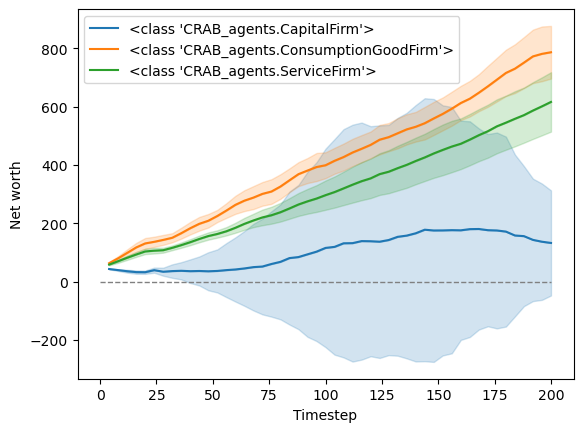

In [13]:
# Plot average net worth per sector
plot_avg_per_type(agent_vars_df_list, agent_type="<class 'CRAB_agents.CapitalFirm'>", var="Net worth", color="tab:blue")
plot_avg_per_type(agent_vars_df_list, agent_type="<class 'CRAB_agents.ConsumptionGoodFirm'>", var="Net worth", color="tab:orange")
plot_avg_per_type(agent_vars_df_list, agent_type="<class 'CRAB_agents.ServiceFirm'>", var="Net worth", color="tab:green")
plt.hlines(y=0, xmin=0, xmax=max(agent_vars_df_list[0]["Step"]), color="grey", linestyle="--", linewidth=1)
plt.show()

#### PRODUCTIVITY and WAGES

##### Productivity : wage ratio

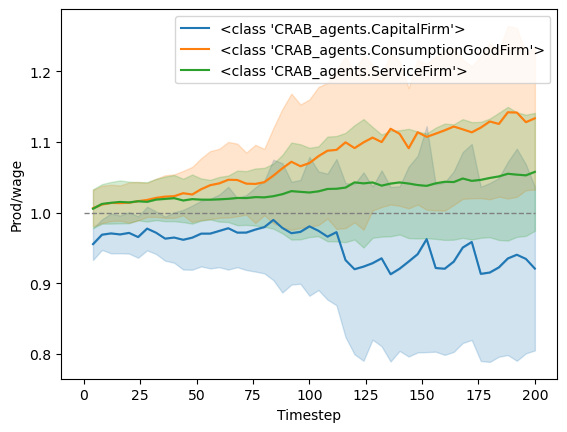

In [15]:
# Plot average ratio productivity : wage per sector
for df in agent_vars_df_list:
    df["Prod/wage"] = df["Prod"]/df["Wage"]
plot_avg_per_type(agent_vars_df_list, agent_type="<class 'CRAB_agents.CapitalFirm'>", var="Prod/wage", color="tab:blue")
plot_avg_per_type(agent_vars_df_list, agent_type="<class 'CRAB_agents.ConsumptionGoodFirm'>", var="Prod/wage", color="tab:orange")
plot_avg_per_type(agent_vars_df_list, agent_type="<class 'CRAB_agents.ServiceFirm'>", var="Prod/wage", color="tab:green")
plt.hlines(y=1, xmin=0, xmax=max(df["Step"]), color="grey", linestyle="--", linewidth=1)
plt.show()

##### Productivity

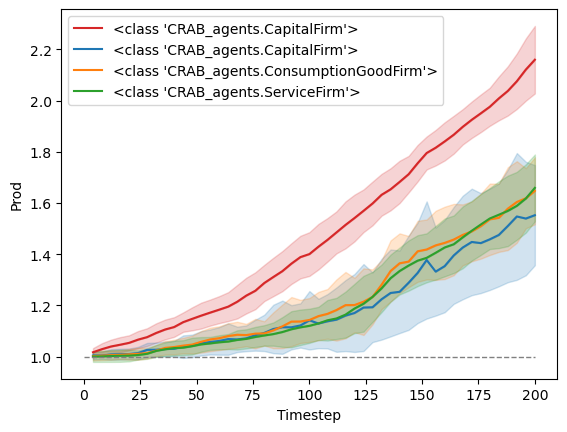

In [16]:
# Plot average productivity per sector
plot_avg_per_type(agent_vars_df_list, agent_type="<class 'CRAB_agents.CapitalFirm'>", var="Machine prod", color="tab:red")
plot_avg_per_type(agent_vars_df_list, agent_type="<class 'CRAB_agents.CapitalFirm'>", var="Prod", color="tab:blue")
plot_avg_per_type(agent_vars_df_list, agent_type="<class 'CRAB_agents.ConsumptionGoodFirm'>", var="Prod", color="tab:orange")
plot_avg_per_type(agent_vars_df_list, agent_type="<class 'CRAB_agents.ServiceFirm'>", var="Prod", color="tab:green")
plt.hlines(y=1, xmin=0, xmax=max(agent_vars_df_list[0]["Step"]), color="grey", linestyle="--", linewidth=1)
plt.show()

##### Wages

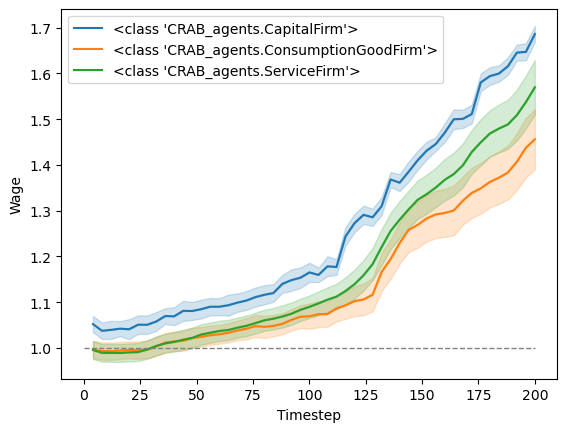

In [17]:
# Plot wages
plot_avg_per_type(agent_vars_df_list, agent_type="<class 'CRAB_agents.CapitalFirm'>", var="Wage", color="tab:blue")
plot_avg_per_type(agent_vars_df_list, agent_type="<class 'CRAB_agents.ConsumptionGoodFirm'>", var="Wage", color="tab:orange")
plot_avg_per_type(agent_vars_df_list, agent_type="<class 'CRAB_agents.ServiceFirm'>", var="Wage", color="tab:green")
plt.hlines(y=1, xmin=0, xmax=max(agent_vars_df_list[0]["Step"]), color="grey", linestyle="--", linewidth=1)
plt.show()

#### MACHINES

##### Capital amount

In [ ]:
# Plot difference between desired machines and ordered machines (average)
plot_total_per_type(agent_vars_df_list, agent_type="<class 'CRAB_agents.CapitalFirm'>", var="Capital amount", color="tab:blue")
plot_total_per_type(agent_vars_df_list, agent_type="<class 'CRAB_agents.ConsumptionGoodFirm'>", var="Capital amount", color="tab:orange")
plot_total_per_type(agent_vars_df_list, agent_type="<class 'CRAB_agents.ServiceFirm'>", var="Capital amount", color="tab:green")
plt.vlines(flood_timesteps, ymin=-1, ymax=100, color="grey", linestyle="--", linewidth=0.7)
plt.show()

##### N machines for replacements

In [ ]:
plot_total_per_type(agent_vars_df_list, agent_type="<class 'CRAB_agents.CapitalFirm'>", var="N replacements", color="tab:blue")
plot_total_per_type(agent_vars_df_list, agent_type="<class 'CRAB_agents.ConsumptionGoodFirm'>", var="N replacements", color="tab:orange")
plot_total_per_type(agent_vars_df_list, agent_type="<class 'CRAB_agents.ServiceFirm'>", var="N replacements", color="tab:green")
plt.show()

##### N machines desired for expansion

In [ ]:
plot_total_per_type(agent_vars_df_list, agent_type="<class 'CRAB_agents.CapitalFirm'>", var="N expansion", color="tab:blue")
plot_total_per_type(agent_vars_df_list, agent_type="<class 'CRAB_agents.ConsumptionGoodFirm'>", var="N expansion", color="tab:orange")
plot_total_per_type(agent_vars_df_list, agent_type="<class 'CRAB_agents.ServiceFirm'>", var="N expansion", color="tab:green")
plt.show()

#### NEW FIRMS VS OLD FIRMS

##### Capital Firms

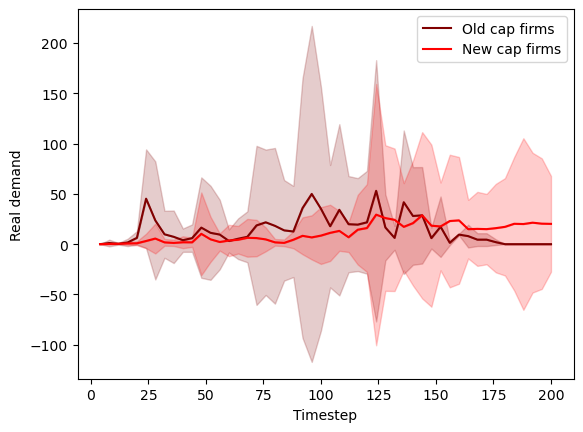

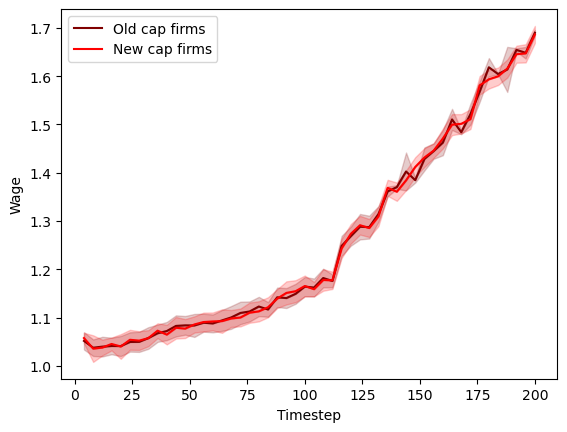

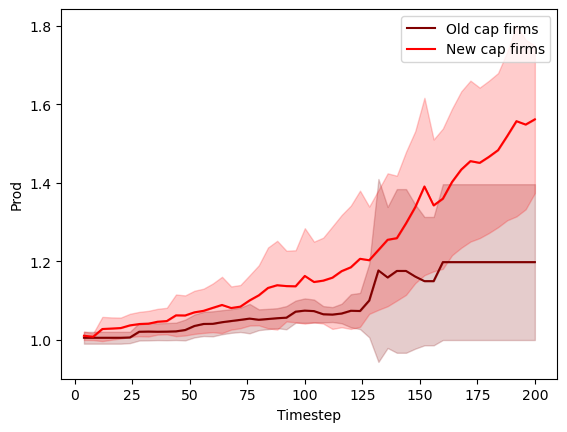

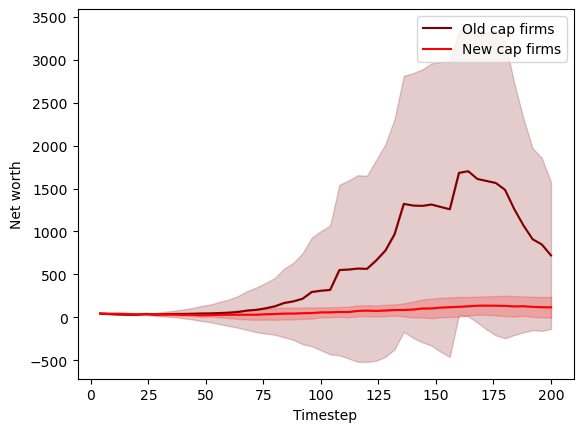

In [14]:
# Plot average demand for new firms and old firms
plot_avg_per_type([cap_firms[cap_firms["AgentID"].isin(old_firms)]],
                   agent_type="<class 'CRAB_agents.CapitalFirm'>", 
                   var="Real demand", color="maroon", label="Old cap firms")
plot_avg_per_type([cap_firms[cap_firms["AgentID"].isin(new_firms)]],
                   agent_type="<class 'CRAB_agents.CapitalFirm'>", 
                   var="Real demand", color="red", label="New cap firms")
plt.show()

# Plot average wage for new firms and old firms
plot_avg_per_type([cap_firms[cap_firms["AgentID"].isin(old_firms)]],
                   agent_type="<class 'CRAB_agents.CapitalFirm'>", 
                   var="Wage", color="maroon", label="Old cap firms")
plot_avg_per_type([cap_firms[cap_firms["AgentID"].isin(new_firms)]],
                   agent_type="<class 'CRAB_agents.CapitalFirm'>", 
                   var="Wage", color="red", label="New cap firms")
plt.show()

# Plot average productivity for new firms and old firms
plot_avg_per_type([cap_firms[cap_firms["AgentID"].isin(old_firms)]],
                   agent_type="<class 'CRAB_agents.CapitalFirm'>", 
                   var="Prod", color="maroon", label="Old cap firms")
plot_avg_per_type([cap_firms[cap_firms["AgentID"].isin(new_firms)]],
                   agent_type="<class 'CRAB_agents.CapitalFirm'>", 
                   var="Prod", color="red", label="New cap firms")
plt.show()

# Plot average net worth for new firms and old firms
plot_avg_per_type([cap_firms[cap_firms["AgentID"].isin(old_firms)]],
                   agent_type="<class 'CRAB_agents.CapitalFirm'>", 
                   var="Net worth", color="maroon", label="Old cap firms")
plot_avg_per_type([cap_firms[cap_firms["AgentID"].isin(new_firms)]],
                   agent_type="<class 'CRAB_agents.CapitalFirm'>", 
                   var="Net worth", color="red", label="New cap firms")
plt.show()

##### Consumption firms

In [ ]:
# Plot average demand for new firms and old firms
plot_avg_per_type([cons_firms[cons_firms["AgentID"].isin(old_firms)]],
                   agent_type="<class 'CRAB_agents.ConsumptionGoodFirm'>", 
                   var="Real demand", color="steelblue", label="Old cons firms")
plot_avg_per_type([cons_firms[cons_firms["AgentID"].isin(new_firms)]],
                   agent_type="<class 'CRAB_agents.ConsumptionGoodFirm'>", 
                   var="Real demand", color="lightblue", label="New cons firms")
plt.show()

# Plot average wage for new firms and old firms
plot_avg_per_type([cons_firms[cons_firms["AgentID"].isin(old_firms)]],
                   agent_type="<class 'CRAB_agents.ConsumptionGoodFirm'>", 
                   var="Wage", color="steelblue", label="Old cons firms")
plot_avg_per_type([cons_firms[cons_firms["AgentID"].isin(new_firms)]],
                   agent_type="<class 'CRAB_agents.ConsumptionGoodFirm'>", 
                   var="Wage", color="lightblue", label="New cons firms")
plt.show()

# Plot average productivity for new firms and old firms
plot_avg_per_type([cons_firms[cons_firms["AgentID"].isin(old_firms)]],
                   agent_type="<class 'CRAB_agents.ConsumptionGoodFirm'>", 
                   var="Prod", color="steelblue", label="Old cons firms")
plot_avg_per_type([cons_firms[cons_firms["AgentID"].isin(new_firms)]],
                   agent_type="<class 'CRAB_agents.ConsumptionGoodFirm'>", 
                   var="Prod", color="lightblue", label="New cons firms")
plt.show()

# Plot average net worth for new firms and old firms
plot_avg_per_type([cons_firms[cons_firms["AgentID"].isin(old_firms)]],
                   agent_type="<class 'CRAB_agents.ConsumptionGoodFirm'>", 
                   var="Net worth", color="steelblue", label="Old cons firms")
plot_avg_per_type([cons_firms[cons_firms["AgentID"].isin(new_firms)]],
                   agent_type="<class 'CRAB_agents.ConsumptionGoodFirm'>", 
                   var="Net worth", color="lightblue", label="New cons firms")
plt.show()

##### Service firms

In [ ]:
# Plot average demand for new firms and old firms
plot_avg_per_type([serv_firms[serv_firms["AgentID"].isin(old_firms)]],
                   agent_type="<class 'CRAB_agents.ServiceFirm'>", 
                   var="Real demand", color="green", label="Old serv firms")
plot_avg_per_type([serv_firms[serv_firms["AgentID"].isin(new_firms)]],
                   agent_type="<class 'CRAB_agents.ServiceFirm'>", 
                   var="Real demand", color="mediumseagreen", label="New serv firms")
plt.show()

# Plot average wage for new firms and old firms
plot_avg_per_type([serv_firms[serv_firms["AgentID"].isin(old_firms)]],
                   agent_type="<class 'CRAB_agents.ServiceFirm'>", 
                   var="Wage", color="green", label="Old serv firms")
plot_avg_per_type([serv_firms[serv_firms["AgentID"].isin(new_firms)]],
                   agent_type="<class 'CRAB_agents.ServiceFirm'>", 
                   var="Wage", color="mediumseagreen", label="New serv firms")
plt.show()

# Plot average productivity for new firms and old firms
plot_avg_per_type([serv_firms[serv_firms["AgentID"].isin(old_firms)]],
                   agent_type="<class 'CRAB_agents.ServiceFirm'>", 
                   var="Prod", color="green", label="Old serv firms")
plot_avg_per_type([serv_firms[serv_firms["AgentID"].isin(new_firms)]],
                   agent_type="<class 'CRAB_agents.ServiceFirm'>", 
                   var="Prod", color="mediumseagreen", label="New serv firms")
plt.show()

# Plot average net worth for new firms and old firms
plot_avg_per_type([serv_firms[serv_firms["AgentID"].isin(old_firms)]],
                   agent_type="<class 'CRAB_agents.ServiceFirm'>", 
                   var="Net worth", color="green", label="Old serv firms")
plot_avg_per_type([serv_firms[serv_firms["AgentID"].isin(new_firms)]],
                   agent_type="<class 'CRAB_agents.ServiceFirm'>", 
                   var="Net worth", color="mediumseagreen", label="New serv firms")
plt.show()